In [47]:
import pandas as pd

# Load the dataset
file_path = '../Data/After/2023.02.StartOfSemester.Coded.csv'
# Try different encodings if the default 'utf-8' fails
encodings = ['latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read file with encoding: {encoding}")

# Display the first few rows of the dataset
print(df.head())

File successfully read with encoding: latin1
     N                                           concerns concerns category  \
0  551  That all of my knowledge from calc BC escapes ...                AC   
1  416  My only concern about this course is that I wi...                AC   
2  422  My only concern is if I'll be able to study/pr...                AC   
3  408  My only concern is that so far the video lesso...                AC   
4  356  One thing that was concerning for me last seme...                AC   

                                       anything else anything else category  
0  The sample exams and quizzes during linear alg...                     AC  
1                                                NaN                     NC  
2                                                NaN                     NC  
3                                                NaN                     NC  
4                                                NaN                     NC  


In [48]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'concerns' and 'anything else' columns
df['concerns'] = df['concerns'].astype(str).apply(clean_text)
df['anything else'] = df['anything else'].astype(str).apply(clean_text)

# Combine the 'concerns' and 'anything else' columns for analysis
df['text'] = df['concerns'] + " " + df['anything else']
print(df.head())

     N                                           concerns concerns category  \
0  551  that all of my knowledge from calc bc escapes ...                AC   
1  416  my only concern about this course is that i wi...                AC   
2  422  my only concern is if ill be able to studyprep...                AC   
3  408  my only concern is that so far the video lesso...                AC   
4  356  one thing that was concerning for me last seme...                AC   

                                       anything else anything else category  \
0  the sample exams and quizzes during linear alg...                     AC   
1                                                nan                     NC   
2                                                nan                     NC   
3                                                nan                     NC   
4                                                nan                     NC   

                                                te

In [49]:
# Concatenate all responses into a single string
all_text = df['text'].str.cat(sep=' ')
print(all_text[:50000])  # Display the first 500 characters for verification

that all of my knowledge from calc bc escapes my brain the sample exams and quizzes during linear algebra helped out a lot if we could have those for multivariable calc that would be fantastic my only concern about this course is that i will have an issue learning one of the fundamental items early in the course and as a result of that will struggle later on when building upon that foundational knowledge nan my only concern is if ill be able to studyprepare to the same degree for exams that i did last semester but other than that i feel confident nan my only concern is that so far the video lessons are not as clear as they were in the linear algebra course this could just be me though as they are still very comprehensive nan one thing that was concerning for me last semester was my mastery on certain topics there were some topics in linear algebra that i couldnt fully explore due to other work and activities for mv calc i hope to fix this issue by writing notes and practice problems do

In [50]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 819.2 kB/s eta 0:00:16
     - -------------------------------------- 0.5/12.8 MB 2.7 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 4.7 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 6.3 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 7.5 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 8.2 MB/s eta 0:00:02
     ----------- ---------------------------- 3.5/12.8 MB 8.7 MB/s eta 0:00:02
     ------------ --------------------------- 4.1/12.8 MB 9.0 MB/s eta 0:00:01
     -------------- ------------------------- 4.7/12.8 MB 9.4 MB/s eta 0:00:01
     ---------------- ----------------------- 5.3/12.8 MB 9.6 MB

In [51]:
import spacy
from collections import Counter

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Create a spaCy document
doc = nlp(all_text)

# Extract lemmas of non-stop words and non-punctuation
words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
word_freq = Counter(words)

# Display the most common words
print(word_freq.most_common(30))

[('nan', 673), ('course', 112), ('exam', 89), ('concern', 82), ('semester', 66), ('concerned', 66), ('m', 64), ('calculus', 44), ('not', 42), ('linear', 41), ('algebra', 41), ('work', 41), ('time', 41), ('learn', 40), ('na', 37), ('class', 35), ('able', 34), ('worried', 34), ('like', 33), ('need', 32)]


In [52]:
from spacy.matcher import Matcher

# Initialize the matcher
matcher = Matcher(nlp.vocab)

# Define the pattern: an adjective followed by a noun
pattern = [{'POS': 'ADJ'}, {'POS': 'NOUN'}]
matcher.add('ADJ_PHRASE', [pattern])

# Find matches in the document
matches = matcher(doc, as_spans=True)
phrases = [span.text.lower() for span in matches]
phrase_freq = Counter(phrases)

# Display the most common adjective-noun phrases
print(phrase_freq.most_common(30))


[('last semester', 31), ('linear algebra', 16), ('last year', 11), ('multivariable calculus', 10), ('other classes', 8), ('biggest concern', 6), ('only concern', 5), ('main concern', 5), ('high school', 5), ('final exam', 4), ('only thing', 4), ('false questions', 3), ('extra credit', 3), ('weekly quizzes', 3), ('multivariable calc', 2), ('last semesters', 2), ('most concern', 2), ('old version', 2), ('large workload', 2), ('much matrices', 2), ('worst nighpcare', 2), ('other commipcents', 2), ('many people', 2), ('online courses', 2), ('extra exam', 2), ('much practice', 2), ('few days', 2), ('major concerns', 2), ('spatial reasoning', 2), ('senior year', 2)]


In [53]:
want_adj = []
matcher = Matcher(nlp.vocab)
pattern = [
    {'LOWER': {'IN': ['i', 'we', 'me']}},
    {'IS_ALPHA': True, 'OP': '?'},
    {'LOWER': {'IN': ['need', 'want']}},
    {'IS_ALPHA': True, 'OP': '?'},
    {'IS_ALPHA': True, 'OP': '?'},
    {'POS': 'NOUN'}
]
matcher.add("WantPhrase", [pattern])

# Find matches in the document
matches = matcher(doc, as_spans=True)

# Extract phrases
phrases = [span.text.lower() for span in matches]
phrase_freq = Counter(phrases)

# Display the most common "I/we want/need" phrases
print(phrase_freq.most_common(30))


[('i need help', 1), ('i need refreshing', 1), ('i may need some assistance', 1), ('i will need additional resources', 1), ('i need any help', 1)]


In [54]:
# Save the word frequencies and phrase frequencies to a CSV file
word_freq_df = pd.DataFrame(word_freq.most_common(), columns=['word', 'frequency'])
phrase_freq_df = pd.DataFrame(phrase_freq.most_common(), columns=['phrase', 'frequency'])

word_freq_df.to_csv('word_frequencies.csv', index=False)
phrase_freq_df.to_csv('phrase_frequencies.csv', index=False)


C:\Users\91963\AppData\Local\Temp\ipykernel_33064\1523896416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')


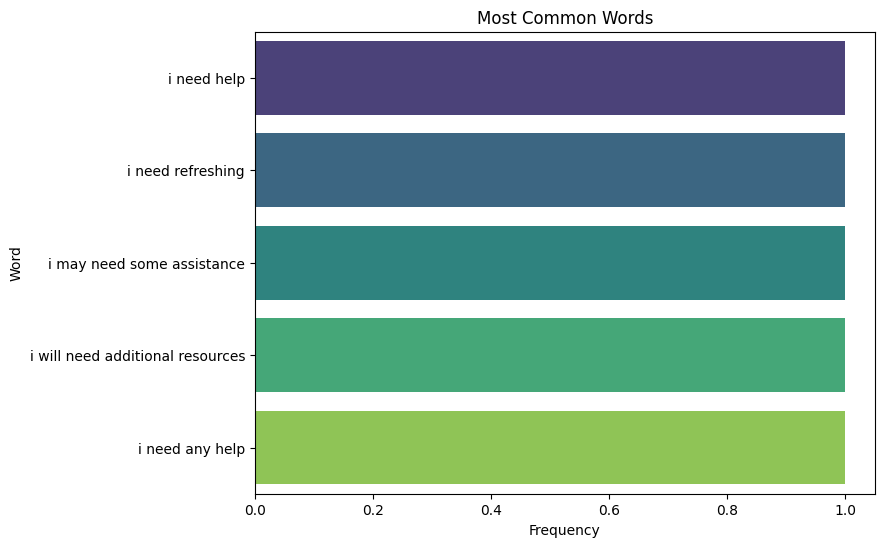

In [55]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(phrase_freq.most_common(25), columns=['Word', 'Frequency'])

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.title('Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()